# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [4]:
import os

files = os.listdir()
for file in files:
  if  file.endswith(".csv"):
    print(file)

In [5]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [7]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


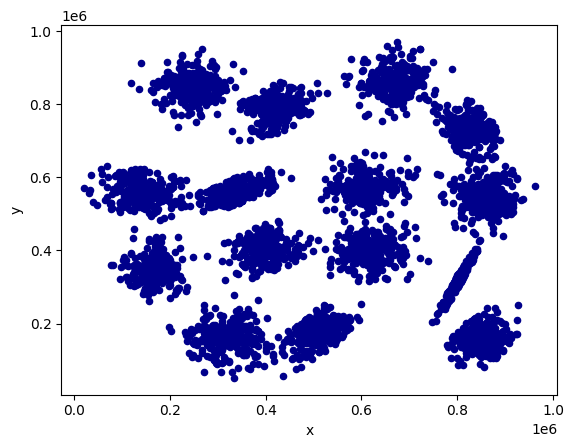

In [8]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

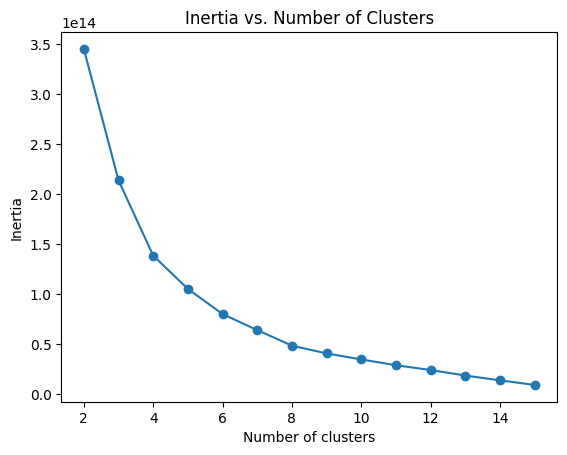

In [9]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#START CODE
inertia = [ ]
for k in range (2, 16):
  model = KMeans(n_clusters=k, random_state=123, n_init=k)
  model.fit(data)
  inertia.append(model.inertia_)

plt.plot(range(2, 16), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()



#END CODE

In [10]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#START CODE
kmeans = cluster.KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
kmeans.predict(data)
label = kmeans.predict(data)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score= 0.46392568634109593


## Proses Visualisasi hasil CLuster

In [11]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data


#START CODE
result = data.copy()
result['cluster'] = kmeans.labels_
result.head()
#END CODE

,x,y,cluster
0,664159,550946,3
1,665845,557965,3
2,597173,575538,3
3,618600,551446,3
4,635690,608046,3


<Figure size 600x300 with 0 Axes>

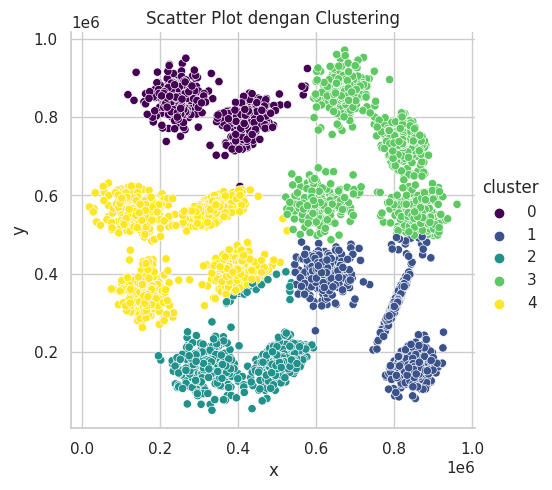

In [12]:
#Lakukan Plotting terhadap data
import seaborn as sns
import matplotlib.pyplot as plt
#Gunakan library seaborn, lebih mudah.

#START CODE
data_to_plot = pd.DataFrame(result)

sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.relplot(data=data_to_plot, x='x', y='y', hue='cluster', palette='viridis', kind='scatter')
plt.title('Scatter Plot dengan Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#END CODE